**DATA ANALYSIS**


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('hearing_test.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             5000 non-null   float64
 1   physical_score  5000 non-null   float64
 2   test_result     5000 non-null   int64  
dtypes: float64(2), int64(1)
memory usage: 117.3 KB


In [4]:
df.head()

,age,physical_score,test_result
0,33.0,40.7,1
1,50.0,37.2,1
2,52.0,24.7,0
3,56.0,31.0,0
4,35.0,42.9,1


In [5]:
df.describe()

,age,physical_score,test_result
count,5000.000000,5000.000000,5000.000000
mean,51.609000,32.760260,0.600000
std,11.287001,8.169802,0.489947
min,18.000000,-0.000000,0.000000
25%,43.000000,26.700000,0.000000
50%,51.000000,35.300000,1.000000
75%,60.000000,38.900000,1.000000
max,90.000000,50.000000,1.000000


In [6]:
df['test_result'].value_counts()

1    3000
0    2000
Name: test_result, dtype: int64

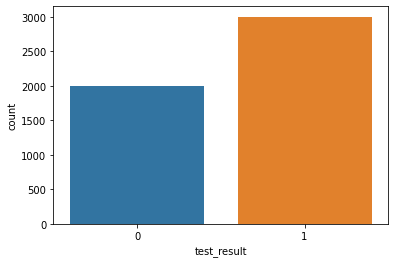

In [7]:
sns.countplot(x = 'test_result', data = df)

In [8]:
df.corr()

,age,physical_score,test_result
age,1.000000,-0.782146,-0.683171
physical_score,-0.782146,1.000000,0.792716
test_result,-0.683171,0.792716,1.000000


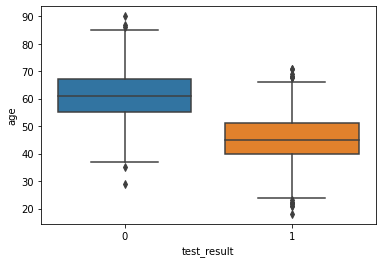

In [9]:
sns.boxplot(x = 'test_result', y = 'age',data = df)

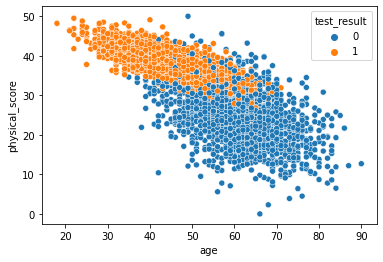

In [10]:
sns.scatterplot(x = 'age',y = 'physical_score', hue= 'test_result',data = df)

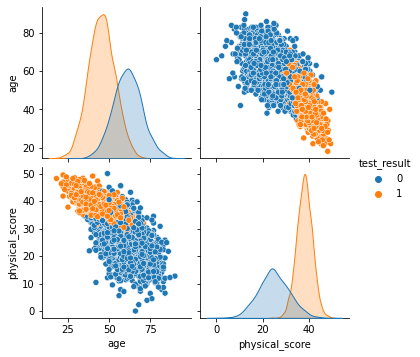

In [11]:
sns.pairplot(df,hue = 'test_result')

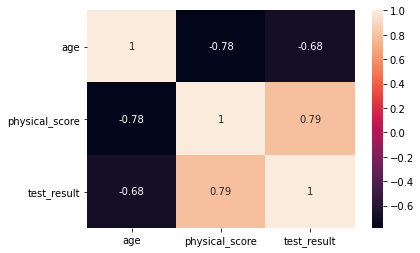

In [12]:
sns.heatmap(df.corr(),annot = True)

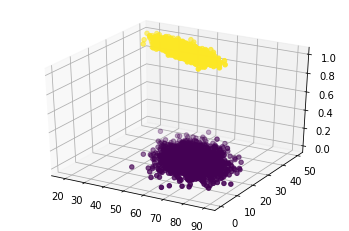

In [13]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = fig.add_subplot(111, projection = '3d')
ax.scatter(df['age'], df['physical_score'], df['test_result'], c = df['test_result'])

**Final Analysis**

It is clear from the above analyis that as the age of the person increases, his hearing ability slowly decreases which can visualised by the graph here.

**Data Preperation and Model Selection**

In [14]:
 df.head()

,age,physical_score,test_result
0,33.0,40.7,1
1,50.0,37.2,1
2,52.0,24.7,0
3,56.0,31.0,0
4,35.0,42.9,1


In [15]:
X = df.drop('test_result', axis = 1)

In [16]:
y = df['test_result']

In [17]:
from sklearn.model_selection import train_test_split

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=101)

In [19]:
from sklearn.preprocessing import StandardScaler

In [20]:
scaler = StandardScaler()

In [21]:
X_train = scaler.fit_transform(X_train)

In [22]:
X_test = scaler.transform(X_test)

In [23]:
from sklearn.linear_model import LogisticRegression

In [24]:
model_1 = LogisticRegression()

In [25]:
model_1.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [26]:
model_1.coef_

array([[-0.94953524,  3.45991194]])

In [27]:
y_pred = model_1.predict(X_test)

In [28]:
y_pred

array([1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1,
       0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0,
       0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0,
       0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1,
       1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1,
       1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1,
       1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1,
       0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0,
       1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1,

In [29]:
y_pred1= model_1.predict_proba(X_test)

In [30]:
y_pred1

array([[2.38434328e-02, 9.76156567e-01],
       [2.69240761e-02, 9.73075924e-01],
       [9.89194168e-01, 1.08058325e-02],
       [1.90768955e-03, 9.98092310e-01],
       [9.75012619e-01, 2.49873806e-02],
       [9.89652504e-01, 1.03474957e-02],
       [7.40226674e-02, 9.25977333e-01],
       [1.70943342e-02, 9.82905666e-01],
       [9.97066033e-01, 2.93396692e-03],
       [3.30521615e-02, 9.66947839e-01],
       [8.31035903e-02, 9.16896410e-01],
       [9.92865306e-03, 9.90071347e-01],
       [7.08965218e-03, 9.92910348e-01],
       [9.34236379e-01, 6.57636209e-02],
       [1.16594927e-04, 9.99883405e-01],
       [6.58904151e-02, 9.34109585e-01],
       [9.89126706e-01, 1.08732938e-02],
       [2.80051357e-03, 9.97199486e-01],
       [5.58920624e-04, 9.99441079e-01],
       [9.96523291e-01, 3.47670946e-03],
       [8.81757060e-01, 1.18242940e-01],
       [1.31030473e-01, 8.68969527e-01],
       [5.45646751e-01, 4.54353249e-01],
       [3.44064171e-02, 9.65593583e-01],
       [3.983864

In [31]:
model_1.coef_

array([[-0.94953524,  3.45991194]])

In [32]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [33]:
accuracy = accuracy_score(y_test, y_pred)

In [34]:
accuracy

0.93

In [35]:
confusion_matrix(y_test,y_pred)

array([[172,  21],
       [ 14, 293]])

In [36]:
from sklearn.metrics import plot_confusion_matrix

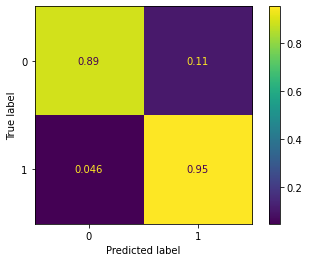

In [37]:
plot_confusion_matrix(model_1, X_test, y_test, normalize='true')

In [38]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.92      0.89      0.91       193
           1       0.93      0.95      0.94       307

    accuracy                           0.93       500
   macro avg       0.93      0.92      0.93       500
weighted avg       0.93      0.93      0.93       500



In [39]:
from sklearn.metrics import plot_precision_recall_curve, plot_roc_curve

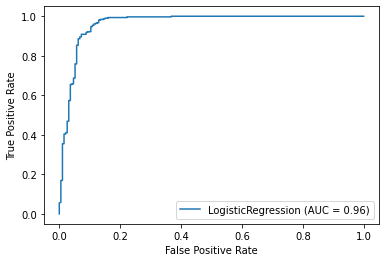

In [40]:
plot_roc_curve(model_1, X_test, y_test)

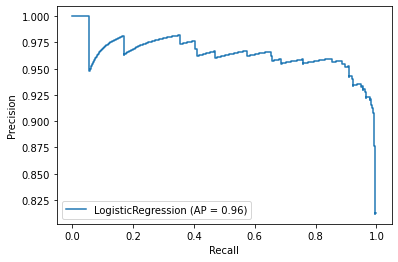

In [41]:
plot_precision_recall_curve(model_1, X_test, y_test)

In [42]:
model_1.predict_log_proba(X_test)

array([[-3.73624645e+00, -2.41322882e-02],
       [-3.61473437e+00, -2.72931691e-02],
       [-1.08646395e-02, -4.52766925e+00],
       [-6.26186243e+00, -1.90951150e-03],
       [-2.53048651e-02, -3.68938436e+00],
       [-1.04014032e-02, -4.57101075e+00],
       [-2.60338392e+00, -7.69055235e-02],
       [-4.06900821e+00, -1.72421290e-02],
       [-2.93827944e-03, -5.83139987e+00],
       [-3.40966832e+00, -3.36107265e-02],
       [-2.48766737e+00, -8.67607797e-02],
       [-4.61233045e+00, -9.97827083e-03],
       [-4.94911900e+00, -7.11490318e-03],
       [-6.80257902e-02, -2.72168847e+00],
       [-9.05680479e+00, -1.16601725e-04],
       [-2.71976229e+00, -6.81615190e-02],
       [-1.09328401e-02, -4.52144561e+00],
       [-5.87795246e+00, -2.80444235e-03],
       [-7.48950309e+00, -5.59076878e-04],
       [-3.48276726e-03, -5.66166899e+00],
       [-1.25838703e-01, -2.13501396e+00],
       [-2.03232536e+00, -1.40447221e-01],
       [-6.05783489e-01, -7.88880302e-01],
       [-3.